In [6]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from tqdm import tqdm
import seaborn as sbn
import os
sbn.set()

<h3>(1) Simulated Annealing for TSP </h3>

In [120]:
def permute(route):
    assert type(route) == np.ndarray, 'please insert a route of type ndarray'
    
    route = route.copy()
    # Choose index of two random stations and swap them
    idxs = np.random.choice(np.arange(1, len(route) - 1), size = 2, replace=False)

    temp = route[idxs[0]]
    route[idxs[0]] = route[idxs[1]]
    route[idxs[1]] = temp

    return route

def dist(t_1, t_2):
    return np.sqrt((t_1[0] - t_2[0]) ** 2 + (t_1[1] - t_2[1]) ** 2)

def cost(route, cost_matrix = None, coords = None):
    assert not (cost_matrix is None and coords is None), 'insert either town coordinates or cost matrix'

    if not cost_matrix is None:
        return np.sum([cost_matrix[route[i], route[i + 1]] for i in range(len(route) - 1)])
    else:
        return np.sum([dist(coords[route[i]], coords[route[i + 1]]) for i in range(len(route) - 1)])

def T_1(k):
    return 1 / np.sqrt(1 + k)

def T_2(k):
    return - np.log(k + 1)


def plot_route(route, coords):
    plt.plot(coords[route, 0], coords[route, 1], 'o-')
    plt.show()


def simulated_annealing(n, K, cost_matrix = None, coords = None):

    log_costs = np.zeros(K) # Log costs of states (routes)

    # Generate random route
    route = np.arange(0, n)
    np.random.shuffle(route)
    route = np.append(route, route[0])

    route_original = route.copy()

    # Perform random walk
    for k in range(K):
        # Propose to jump from route to permuted route
        route_perm = permute(route)

        # Calculate cost
        c_1 = cost(route_perm, cost_matrix = cost_matrix, coords = coords)
        c_2 = cost(route, cost_matrix = cost_matrix, coords = coords)
        
        delta_energy = c_1 - c_2

        if delta_energy < 0:
            route = route_perm
        elif np.exp(-delta_energy / T_1(k / 10)) > np.random.uniform(0, 1, 1):
            route = route_perm

        log_costs[k] = cost(route, cost_matrix = cost_matrix, coords = coords)
    
    return route_original, route, log_costs

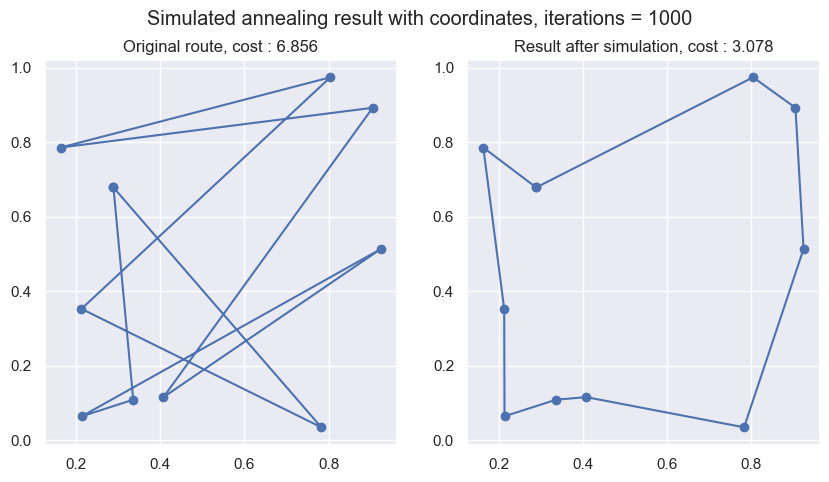

In [103]:
# Generate random points in plane
n = 10
K = 1000
coords = np.random.rand(n, 2)

route_original, route, _ = simulated_annealing(n, K = K, coords = coords)

fig, ax = plt.subplots(1, 2, figsize = (10, 5))
ax[0].plot(coords[route_original, 0], coords[route_original, 1], 'o-')
ax[0].set_title(f'Original route, cost : {cost(route_original, coords = coords):.3f}')
ax[1].plot(coords[route, 0], coords[route, 1], 'o-')
ax[1].set_title(f'Result after simulation, cost : {cost(route, coords = coords):.3f}')
fig.suptitle(f'Simulated annealing result with coordinates, iterations = {K}')

plt.show()

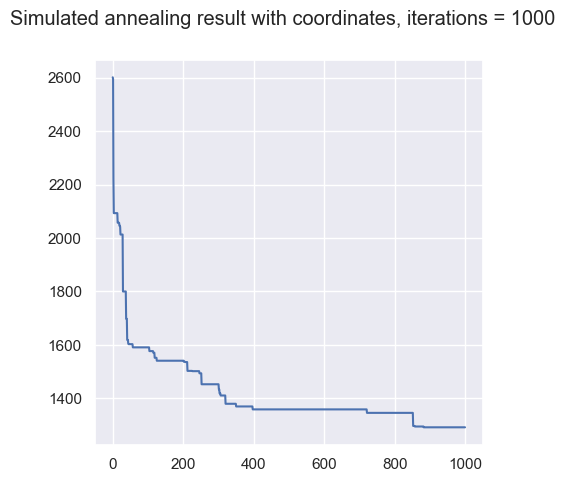

In [125]:
# Simulated annealing using cost_matrix
cost_matrix = np.loadtxt(os.path.join(os.getcwd(), 'cost.csv'), delimiter=',', dtype=int)
n = 20
K = 1000
route_original, route, log_costs = simulated_annealing(n, K = K, cost_matrix = cost_matrix)

fig, ax = plt.subplots(1, 1, figsize = (5,5))
ax.plot(log_costs, label = 'route cost')
fig.suptitle(f'Simulated annealing result with coordinates, iterations = {K}')

plt.show()